# Introduction to Neural Networks: Classification

Author: Pierre Nugues

## A Dataset: *Salammbô* in French and English

### Understanding the Dataset

The counts of letters and _A_ broken down by chapter in *Salammbô* in French and its translation in English. The $\mathbf{X}$ matrix contains the counts and $y$ the language; French: 1 and English: 0.

In [1]:
import numpy as np
np.random.seed(0)

X = np.array(
    [[35680, 2217], [42514, 2761], [15162, 990], [35298, 2274],
     [29800, 1865], [40255, 2606], [74532, 4805], [37464, 2396],
     [31030, 1993], [24843, 1627], [36172, 2375], [39552, 2560],
     [72545, 4597], [75352, 4871], [18031, 1119], [36961, 2503],
     [43621, 2992], [15694, 1042], [36231, 2487], [29945, 2014],
     [40588, 2805], [75255, 5062], [37709, 2643], [30899, 2126],
     [25486, 1784], [37497, 2641], [40398, 2766], [74105, 5047],
     [76725, 5312], [18317, 1215]
     ], dtype='float64')

y = np.array(
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Visualizing the Data

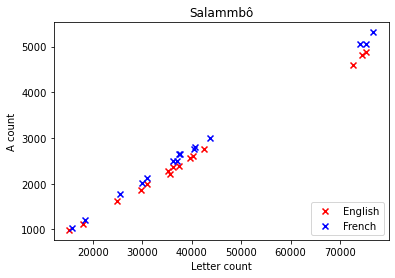

In [2]:
import matplotlib.pyplot as plt

X_english, X_french = np.split(X, 2)

en = plt.scatter(X_english[:,0], X_english[:,1], c='r', marker='x')
fr = plt.scatter(X_french[:,0], X_french[:,1], c='b', marker='x')
plt.title("Salammbô")
plt.xlabel("Letter count")
plt.ylabel("A count")
plt.legend((en, fr), ('English', 'French'), loc='lower right', scatterpoints=1)
plt.show()

It is probably possible to determine the language using the counts

## Building a Larger Dataset

Let us extend the dataset to cover all the paragraphs, where we will count all the letters.<br/> Structure of the dataset:<br/>

|Obs.   | *x*                              |class   |
|-------|----------------------------------|--------|
|para_1 | a_counts, b_counts, c_counts, ...| English|
|para_2 |a_counts, b_counts, c_counts, ... |English |
|...    |...                               |...    |
|para_1000| a_counts, b_counts, c_counts, ...|French|
|para_1001| a_counts, b_counts, c_counts, ...| French|
|...      |...                               |...     |

### A Function to Count Characters

In [3]:
def count_chars(string):
    counts = {}
    for char in string:
        if char.isalpha():
            if char in counts:
                counts[char] += 1
            else:
                counts[char] = 1
    return counts

### We Extract the Counts

In [4]:
salammbo_en = open('../../EDAN20/programs/corpus/Salammbo/salammbo_en.txt').read().strip().lower()
salammbo_fr = open('../../EDAN20/programs/corpus/Salammbo/salammbo.txt').read().strip().lower()

para_en = filter(None, salammbo_en.split('\n'))
para_fr = filter(None, salammbo_fr.split('\n'))

counts_en = list(filter(None, map(count_chars, para_en)))
counts_fr = list(filter(None, map(count_chars, para_fr)))
counts = counts_en + counts_fr
counts[:5]

[{'s': 1, 'a': 2, 'l': 1, 'm': 2, 'b': 1, 'ô': 1},
 {'b': 2,
  'y': 1,
  'g': 1,
  'u': 2,
  's': 1,
  't': 2,
  'a': 2,
  'v': 1,
  'e': 2,
  'f': 1,
  'l': 1,
  'r': 1},
 {'c': 1, 'h': 1, 'a': 1, 'p': 1, 't': 1, 'e': 1, 'r': 1, 'i': 1},
 {'c': 1, 'h': 1, 'a': 1, 'p': 1, 't': 1, 'e': 1, 'r': 1, 'i': 2},
 {'c': 1, 'h': 1, 'a': 1, 'p': 1, 't': 1, 'e': 1, 'r': 1, 'i': 3}]

### Formatting the Dataset

We associate the characters with indices

In [5]:
from sklearn.feature_extraction import DictVectorizer

dict_vec = DictVectorizer(sparse=False)
dict_vec.fit(counts)
dict_vec.vocabulary_

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 'à': 26,
 'â': 27,
 'æ': 28,
 'ç': 29,
 'è': 30,
 'é': 31,
 'ê': 32,
 'ë': 33,
 'î': 34,
 'ï': 35,
 'ô': 36,
 'ù': 37,
 'û': 38,
 'œ': 39}

We convert the dictionaries into matrices

In [6]:
X_en = dict_vec.transform(counts_en)
X_fr = dict_vec.transform(counts_fr)
print(X_en.shape)
print(X_fr.shape)

(1971, 40)
(2015, 40)


We stack the French and English datasets

In [7]:
X = np.vstack((X_en, X_fr))
y = [0] * len(counts_en) + [1] * len(counts_fr)
X[:5,:]

array([[2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0.],
       [2., 2., 0., 0., 2., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 2., 2., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 1., 3., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

### Training and Validation Sets

#### We shuffle the indices

In [8]:
indices = list(range(X.shape[0]))
np.random.shuffle(indices)
print(indices[:10])
X = X[indices, :]
y = np.array(y)[indices]

[2952, 1523, 3945, 3605, 545, 1465, 3856, 1390, 587, 1276]


#### We split the dataset

In [9]:
training_examples = int(X.shape[0] * 0.8)

X_train = X[:training_examples, :]
y_train = y[:training_examples]

X_val = X[training_examples:, :]
y_val = y[training_examples:]

### Standardizing the Dataset

We standardize the dataset. This is very significant for the final result

In [10]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

X_train = std.transform(X_train)
X_val = std.transform(X_val)
X_train[:3, :]

array([[ 0.52851591, -0.1155739 ,  0.06498621,  0.66303445,  0.81595504,
         0.91256889,  0.74366955, -0.31114723,  0.80415086, -0.43635016,
        -0.51761272,  1.09219625,  1.29698511,  0.38315057,  0.5504143 ,
         1.19859483,  3.14696944,  0.55453944,  0.89623654,  0.15733867,
         1.43524873,  1.0624261 , -0.58629949,  1.06623688, -0.33305714,
         4.78360811,  0.50174901,  1.98572131, -0.12570222, -0.31253672,
        -0.49576854,  0.58681298,  1.28404143, -0.04342357, -0.24173944,
        -0.17812441, -0.35698046, -0.215202  ,  3.73232195, -0.17110036],
       [ 0.52851591,  0.73273673,  0.37512997,  0.45988656,  0.43309237,
         0.46755633,  0.977732  ,  1.23312476,  0.2532762 ,  0.68912258,
         0.0698381 , -0.20596864, -0.23422901,  0.24725648,  0.85770746,
         0.45420866, -0.06327169,  0.48551161,  0.19362941,  0.93046863,
        -0.13699304,  0.06829214,  1.12750936,  0.2337208 ,  1.44547913,
        -0.39002391, -0.46827879, -0.3562985 ,  7.

## A Simple Feed-Forward Network

### The Model

We create a simple architecture. This is simply logistic regression

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(1, input_dim=X.shape[1], activation='sigmoid')])

# Fitting the network
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 41        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


We fit the model

In [12]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    verbose=0)

### The Model Weights

In [13]:
model.get_weights()

[array([[ 0.03057909],
        [-0.3952341 ],
        [ 0.46589148],
        [-0.5072759 ],
        [-0.41252497],
        [-1.0378247 ],
        [-0.705824  ],
        [-2.9825642 ],
        [ 0.31421047],
        [ 1.2452732 ],
        [-2.2900352 ],
        [ 1.5486445 ],
        [-0.09456186],
        [-0.14914322],
        [-1.077353  ],
        [ 0.32679173],
        [ 1.6044611 ],
        [ 0.16465876],
        [ 0.74501145],
        [-0.6838707 ],
        [ 0.9424702 ],
        [ 0.4714931 ],
        [-2.9659483 ],
        [ 0.20878306],
        [-2.460679  ],
        [ 0.4723719 ],
        [ 1.762782  ],
        [ 1.4937623 ],
        [-0.19498655],
        [ 0.7740779 ],
        [ 2.0856836 ],
        [ 2.9277537 ],
        [ 1.1336205 ],
        [ 0.01470665],
        [ 0.8955391 ],
        [ 0.03811883],
        [ 0.035096  ],
        [ 0.6457152 ],
        [ 0.62291366],
        [ 0.52730346]], dtype=float32),
 array([0.41240975], dtype=float32)]

### Visualizing The Training Process

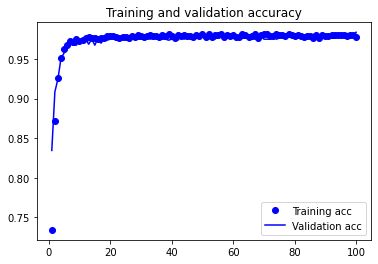

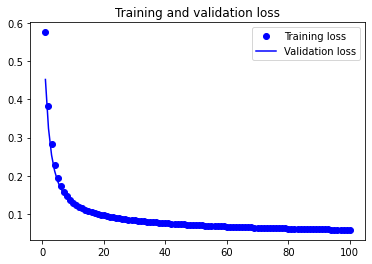

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### Predicting and Evaluating

In [15]:
y_predicted = model.predict(X_val)
print(y_predicted[:10])
print(y_val[:10])

# evaluate the model
scores = model.evaluate(X_val, y_val)
print('Scores:', scores)
"\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100)

[[1.6154826e-01]
 [9.7751856e-01]
 [6.9794778e-15]
 [1.3709273e-29]
 [2.2408644e-06]
 [1.0000000e+00]
 [6.0463786e-01]
 [7.6919941e-06]
 [8.6039291e-09]
 [9.9998713e-01]]
[0 1 0 0 0 1 1 0 0 1]
25/25 [==============================] - 0s 523us/step - loss: 0.0603 - accuracy: 0.9837
Scores: [0.06027311086654663, 0.9837092757225037]


'\naccuracy: 98.37%'

### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = []
for i in y_predicted:
    if i < 0.5:
        y_pred.append([0])
    else:
        y_pred.append([1])
confusion_matrix(y_val, y_pred)

array([[396,  11],
       [  2, 389]])

## A More Complex Model

We build a more complex model with two layers

In [17]:
model = models.Sequential([
    layers.Dense(20, input_dim=X.shape[1], activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Fitting the network
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


And we fit it

In [18]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_val, y_val), verbose=0)

## The Model Weights

In [19]:
model.get_weights()

[array([[-5.21130115e-02, -3.87154035e-02,  2.32730225e-01,
         -5.67924231e-02,  1.49308871e-02, -9.09454376e-02,
          1.75293908e-01,  5.77964522e-02, -7.60738850e-02,
          9.00889263e-02,  1.68086946e-01,  6.03392646e-02,
         -1.02797681e-02,  1.74147695e-01,  1.64644718e-01,
          1.59345865e-02, -2.54129440e-01, -1.11454144e-01,
         -1.00852557e-01, -1.72420397e-01],
        [ 1.27866715e-01,  2.90915389e-02, -1.85598880e-01,
          2.76303619e-01,  2.15763614e-01,  3.87823172e-02,
         -9.01915357e-02, -3.36254612e-02,  2.75078118e-01,
          1.32128090e-01, -2.44829386e-01,  2.79828668e-01,
         -3.33170205e-01,  6.16949424e-02,  1.24458469e-01,
          2.28171080e-01,  2.63082325e-01, -2.52019763e-01,
         -2.75025368e-01,  3.36053893e-02],
        [-4.23539542e-02, -2.00305372e-01, -1.34097144e-01,
         -3.05747151e-01, -1.73229814e-01, -1.98261797e-01,
         -1.20223269e-01, -1.02374487e-01, -1.76459223e-01,
          7.

### Visualizing The Training Process

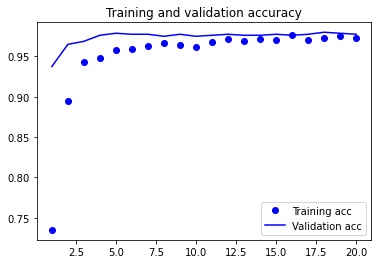

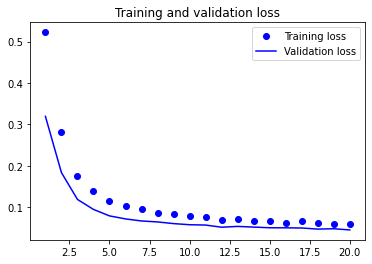

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predicting

In [21]:
y_predicted = model.predict(X_val)
print(y_predicted[:10])

# evaluate the model
scores = model.evaluate(X_val, y_val)
print(scores)
"\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100)

[[4.6498656e-02]
 [9.9593437e-01]
 [9.6433880e-17]
 [2.2206461e-30]
 [2.6095323e-08]
 [1.0000000e+00]
 [6.9206440e-01]
 [1.2173317e-07]
 [1.8940191e-10]
 [9.9997687e-01]]
25/25 [==============================] - 0s 488us/step - loss: 0.0448 - accuracy: 0.9774
[0.044807229191064835, 0.9774436354637146]


'\naccuracy: 97.74%'

### Confusion Matrix

In [22]:
y_pred = []
for i in y_predicted:
    if i < 0.5:
        y_pred.append([0])
    else:
        y_pred.append([1])
confusion_matrix(y_val, y_pred)

array([[400,   7],
       [ 11, 380]])

### For a real system, see the _Compact Language Detector v3_: https://github.com/google/cld3
and a reimplementation: https://github.com/pnugues/language-detector